In [1]:
# baalightcurve, but using jupyter to get more interactive with the data
#  New method: based on astropy Table (from AAVSO tutorial)
import csv
import matplotlib.pyplot as plt
import os
import datetime
from astropy.table import Table

In [2]:
vssdir='/home/john/astro/variable_star_data'
vssfile = 'AH_DRA_20221030_114233.csv'
star_name=vssfile.split('_2')[0]
vssfullpath = os.path.join(vssdir, vssfile)

In [3]:
# get baa data, load as astropy Table
baa_data = Table.read(vssfullpath, encoding='UTF-8')
baa_data.show_in_browser(jsviewer=True)

In [4]:
# find my observations
my_baa_data = Table(dtype=baa_data.dtype)
for observation in baa_data:
    if 'C J Evans' in observation['Observer Name']:
        my_baa_data.add_row(observation)

In [5]:
# overlay my measurements with all measurements from BAA database
#  using modified version of function from aavso
# use the matplotlib interactive widget (ipympl)
def plot_mylightcurve(alldata_JD, alldata_mag, mydata_JD, mydata_mag, chart_title, JDmin, JDmax):
    fig=plt.figure()
    ax1=fig.add_subplot(1,1,1)
    ax1.scatter(alldata_JD, alldata_mag, marker='.')
    ax1.scatter(mydata_JD, mydata_mag, marker='x')
    plt.gca().invert_yaxis()
    plt.title(chart_title)
    plt.xlim([JDmin, JDmax])
    xvals = plt.gca().get_xticks()
    plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in xvals])

/tmp/ipykernel_23808/1180786252.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in xvals])


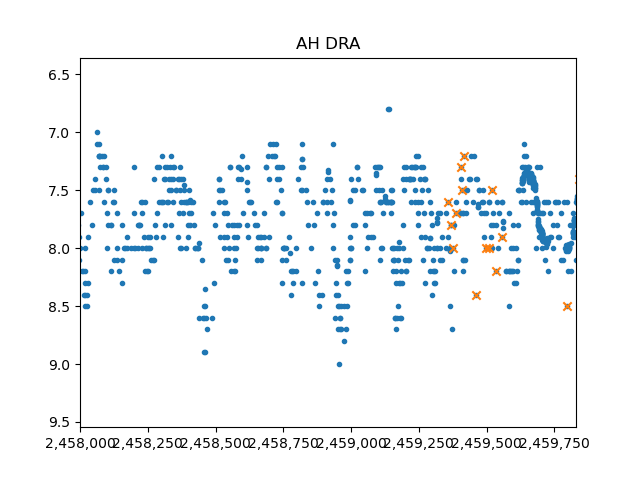

In [6]:
%matplotlib widget
plot_mylightcurve(baa_data['Julian Date'], baa_data['Magnitude'], my_baa_data['Julian Date'], my_baa_data['Magnitude'], my_baa_data['Object'][0], 2458000, 2459830)